# HBFC Loan Customer Analysis

### Building a predictive model to determine to which customers should bank apporach for lending loan using logistic regression involves several steps. Here are the steps we perform in this project:

1. **Import Necessary Libraries:**
   - Import libraries such as pandas, numpy, scikit-learn for data manipulation, analysis, and machine learning.

2. **Load and Explore the Data:**
   - Load your dataset into a pandas DataFrame and explore its structure.

3. **Data Preprocessing:**
   - Handle missing values, if any.
   - Encode categorical variables (e.g., 'Income Categorical', 'Education') using label encoding.
   
4. **Exploratory Data Analysis (EDA):**
   -  EDA is an approach to analyzing and visualizing data sets to summarize their main characteristics, often with the help of statistical graphics and other data visualization methods.

5. **Train-Test Split:**
   - Split the data into training and testing sets.

6. **Build and Train the Logistic Regression Model:**
   - Create a logistic regression model and train it on the training set.

7. **Evaluate the Model:**
   - Evaluate the performance of the model on the testing set.

8. **Interpret the Results:**
   - Interpret the confusion matrix and classification report to understand how well the model is performing.


The HBFC Loan Customer Analysis Project involved developed logistic regression model to identify potential loan customers, providing valuable insight for strategic decision-making and optimizing loan offerings.

#### Step 1:Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

Now, let's provide a brief explanation for each import statement:

1. **pandas (pd):**
   - Pandas is a powerful data manipulation library. It provides data structures like DataFrame for efficient data analysis.

2. **numpy (np):**
   - NumPy is a library for numerical operations in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions.

3. **seaborn (sns):**
   - Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

4. **matplotlib.pyplot (plt):**
   - Matplotlib is a 2D plotting library. Pyplot is a collection of functions that make Matplotlib work like MATLAB, making it easy to create visualizations.
   
5. **Scikit-learn:**
   - Scikit-learn is a comprehensive machine learning library for Python that provides simple and efficient tools for data analysis and modeling, including various algorithms for classification, regression, clustering, and more, along with utilities for preprocessing and model evaluation.

6. **LabelEncoder:**
   - LabelEncoder is a preprocessing step for converting categorical labels into numerical format, which is necessary for many machine learning algorithms.

7. **train_test_split:**
   - This function is used to split the dataset into training and testing sets, a crucial step in machine learning model development.

8. **confusion_matrix, classification_report, accuracy_score:**
   - These are metrics used to evaluate the performance of a classification model. Confusion matrix provides a summary of prediction results, classification report gives precision, recall, and F1-score, and accuracy_score calculates the accuracy of the model.

9. **LogisticRegression:**
   - Logistic Regression is a linear model for binary classification. It's commonly used for predicting the probability of an instance belonging to a particular class.
   

#### Step 2: Load and Explore the Data

Reading data from the Excel file into a Pandas DataFrame by creating a new variable df(Data Frame). The 'sheet_name' parameter specifies the sheet to read (if there are multiple sheets)

In [3]:
df=pd.read_excel(r'C:\Users\user\OneDrive\Desktop\MY POJECT\HBFC_BANK\Bank_Personal_Loan_Modelling.xlsx',sheet_name='Bank_Personal_Loan_Modelling')

Displaying the first rows((dafault=5) of the DataFrame to inspect the data.

In [4]:
df.head()

,ID,Age (in years),Experience (in years),Income (in K/year),Income Categorical,ZIP Code,Family members,CCAvg,Education,Mortgage,...,CreditCard,Column1,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,COMBINATION OF TD & CC,"COMBINATION OF TD & CC, Person who don’t have personal loan",Unnamed: 23
0,15,67,41,112,100+,91741,1,2.0,Undergraduate,0,...,No,30+ years,NaN,NaN,NaN,NaN,NaN,False,False,147.0
1,1481,67,42,32,0-50,93943,1,1.1,Professional,0,...,Yes,30+ years,NaN,NaN,NaN,NaN,NaN,False,False,NaN
2,1860,67,41,20,0-50,91741,2,0.4,Undergraduate,80,...,No,30+ years,NaN,NaN,NaN,NaN,NaN,False,False,NaN
3,2847,67,43,105,100+,93711,4,1.7,Graduate,0,...,No,30+ years,NaN,NaN,NaN,NaN,NaN,False,False,NaN
4,3265,67,41,114,100+,95616,4,2.4,Professional,0,...,No,30+ years,NaN,NaN,NaN,NaN,NaN,False,False,NaN


Displaying the last rows(dafault=5) of the DataFrame to inspect the data.

In [5]:
df.tail()

,ID,Age (in years),Experience (in years),Income (in K/year),Income Categorical,ZIP Code,Family members,CCAvg,Education,Mortgage,...,CreditCard,Column1,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,COMBINATION OF TD & CC,"COMBINATION OF TD & CC, Person who don’t have personal loan",Unnamed: 23
4995,3158,23,1,13,0-50,94720,4,1.0,Undergraduate,84,...,No,0 to 10 years,NaN,NaN,NaN,NaN,NaN,False,False,NaN
4996,3426,23,1,12,0-50,91605,4,1.0,Undergraduate,90,...,No,0 to 10 years,NaN,NaN,NaN,NaN,NaN,False,False,NaN
4997,3825,23,1,12,0-50,95064,4,1.0,Undergraduate,0,...,Yes,0 to 10 years,NaN,NaN,NaN,NaN,NaN,False,False,NaN
4998,4286,23,3,149,100+,93555,2,7.2,Undergraduate,0,...,No,0 to 10 years,NaN,NaN,NaN,NaN,NaN,False,False,NaN
4999,4412,23,2,75,51-100,90291,2,1.8,Graduate,0,...,Yes,0 to 10 years,NaN,NaN,NaN,NaN,NaN,False,False,NaN


Imporatnt Columns in the DataFrame to consider or Variables in data frame
- 'ID': Customer ID
- 'Age (in years)': Age of the customer
- 'Experience (in years)': Years of professional experience
- 'Income (in K/year)': Annual income in thousands
- 'Income Categorical': Categorical representation of income
- 'ZIP Code': ZIP code of the customer
- 'Family members': Number of family members
- 'CCAvg': Average spending on credit cards per month
- 'Education': Education level (e.g., 1: Undergrad, 2: Graduate, 3: Advanced/Professional)
- 'Mortgage': Mortgage value
- 'Personal Loan': Binary indicating if the customer accepted a personal loan (1: Yes, 0: No)
- 'Securities Account': Binary indicating if the customer has a securities account (1: Yes, 0: No)
- 'TD Account': he customer have a Term deposit (Including Fixed and Recurring Deposits) account with the bank? 
- 'Online': Binary indicating if the customer uses online banking (1: Yes, 0: No)
- 'CreditCard': Binary indicating if the customer has a credit card (1: Yes, 0: No)


### Step 3: Data Preprocessing:

Data preprocessing is a crucial step in the data analysis and machine learning pipeline. It involves cleaning and transforming raw data into a format that is suitable for analysis or model training. The goal of preprocessing is to enhance the quality of the data

Data Cleaning is one of the steps involved in Data Preprocessing. Following things we perform in Data Cleaning.

Handle missing values: Impute or remove missing data. If there is no missing values we don't perform these task.

Correct inconsistencies: Resolve errors and inconsistencies in the data if presnt.

Handle outliers: Identify and address outliers. Below we check for Outliers in our Data Frame.

In [6]:
# Check for missing values
df.isnull().sum()

ID                                                                0
Age (in years)                                                    0
Experience (in years)                                             0
Income (in K/year)                                                0
Income Categorical                                                0
ZIP Code                                                          0
Family members                                                    0
CCAvg                                                             0
Education                                                         0
Mortgage                                                          0
Personal Loan                                                     0
Securities Account                                                0
TD Account                                                        0
Online                                                            0
CreditCard                                      

As we can see there is no missing values for the columns we consider as important earlier but there are missing values for the other columns

In [7]:
df.columns

Index(['ID', 'Age (in years)', 'Experience (in years)', 'Income (in K/year)',
       'Income Categorical', 'ZIP Code', 'Family members', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'TD Account', 'Online', 'CreditCard', 'Column1', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'COMBINATION OF TD & CC',
       'COMBINATION OF TD & CC, Person who don’t have personal loan',
       'Unnamed: 23'],
      dtype='object')

Removing the unwanted variables or columns

In [8]:
df.drop(columns=['Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'COMBINATION OF TD & CC',
       'COMBINATION OF TD & CC, Person who don’t have personal loan',
       'Unnamed: 23'],inplace=True)

Checking whether the columns are removed or not.

In [9]:
df.head()

,ID,Age (in years),Experience (in years),Income (in K/year),Income Categorical,ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,TD Account,Online,CreditCard,Column1
0,15,67,41,112,100+,91741,1,2.0,Undergraduate,0,No,Yes,No,No,No,30+ years
1,1481,67,42,32,0-50,93943,1,1.1,Professional,0,No,No,No,No,Yes,30+ years
2,1860,67,41,20,0-50,91741,2,0.4,Undergraduate,80,No,No,No,No,No,30+ years
3,2847,67,43,105,100+,93711,4,1.7,Graduate,0,No,No,No,Yes,No,30+ years
4,3265,67,41,114,100+,95616,4,2.4,Professional,0,No,No,No,Yes,No,30+ years


In [10]:
df.drop(columns='Column1',inplace=True)# we need to the Column 1 as it is not usefull for us.
df.head()

,ID,Age (in years),Experience (in years),Income (in K/year),Income Categorical,ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,TD Account,Online,CreditCard
0,15,67,41,112,100+,91741,1,2.0,Undergraduate,0,No,Yes,No,No,No
1,1481,67,42,32,0-50,93943,1,1.1,Professional,0,No,No,No,No,Yes
2,1860,67,41,20,0-50,91741,2,0.4,Undergraduate,80,No,No,No,No,No
3,2847,67,43,105,100+,93711,4,1.7,Graduate,0,No,No,No,Yes,No
4,3265,67,41,114,100+,95616,4,2.4,Professional,0,No,No,No,Yes,No


In [11]:
df[df.duplicated()] 

,ID,Age (in years),Experience (in years),Income (in K/year),Income Categorical,ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,TD Account,Online,CreditCard


Above command is used to identify and display duplicated rows in a DataFrame. It checks for duplicated rows based on all columns and returns a DataFrame containing the duplicated rows. If there are no duplicates, it will return an empty DataFrame as you can see above.

In [13]:
df1=df.copy()                 # copying the datsets as a backup(not necessary).

## Step 4: Exploratory data analysis

Exploratory Data Analysis (EDA) is a crucial step in understanding and analyzing a dataset. It involves summarizing the main characteristics of a dataset, often with the help of statistical graphics and other data visualization methods. Here's a basic outline for performing EDA in a Jupyter Notebook using Python and common libraries like Pandas, Matplotlib, and Seaborn.

The Exploratory Data Analysis (EDA) process and visualization steps involved in analyzing the dataset can be summarized as follows:

1. **Load and Explore Data:**
   - Load the dataset and examine its structure using functions like `head()`, `info()`, and `describe()`.

2. **Handle Missing Values and Initial Data Cleaning:**
   - Address missing values if necessary and perform initial data cleaning.

3. **Univariate Analysis:**
   - Conduct univariate analysis to understand the distribution of individual variables using techniques like histograms, box plots, and count plots.

4. **Bivariate Analysis:**
   - Explore relationships between pairs of variables through scatter plots, pair plots, and heatmaps to identify potential correlations.

5. **Multivariate Analysis:**
   - Visualize interactions between multiple variables, especially concerning the target variable, using techniques like FacetGrids or more complex visualizations.

6. **Statistical Summary:**
   - Use statistical measures and visualizations to summarize the central tendency, spread, and relationships within the dataset.

7. **Feature Engineering and Transformation:**
   - Assess the need for feature engineering, such as encoding categorical variables, scaling numerical features, or creating new features based on insights.

8. **Identify Outliers:**
   - Use visualizations like box plots to identify and understand the presence of outliers.

9. **Correlation Analysis:**
   - Explore correlations between numerical variables using a correlation matrix heatmap.

10. **Final Feature Selection:**
    - Make informed decisions about variable usefulness based on visual insights and analysis.
   
11. **Concluding Insights:**
    - Summarize the overall analysis, identify potential redundancies or irrelevant features, and highlight variables that may have a significant impact on the target variable.

12. **Iterative Process:**
    - EDA is often an iterative process, with steps revisited based on new insights gained during analysis.

This process involves a combination of statistical measures and visualizations to gain a comprehensive understanding of the dataset, identify patterns, and inform decisions about feature selection and potential transformations for subsequent modeling steps.

In [14]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age (in years)         5000 non-null   int64  
 2   Experience (in years)  5000 non-null   int64  
 3   Income (in K/year)     5000 non-null   int64  
 4   Income Categorical     5000 non-null   object 
 5   ZIP Code               5000 non-null   int64  
 6   Family members         5000 non-null   int64  
 7   CCAvg                  5000 non-null   float64
 8   Education              5000 non-null   object 
 9   Mortgage               5000 non-null   int64  
 10  Personal Loan          5000 non-null   object 
 11  Securities Account     5000 non-null   object 
 12  TD Account             5000 non-null   object 
 13  Online                 5000 non-null   object 
 14  CreditCard             5000 non-null   object 
dtypes: f

The Above output has the following information for each column:
Column Name: The name of the column.
Non-Null Count: The number of non-null (non-missing) values in the column.
Data Type: The data type of the values in the column. This includes types like int, float, object.

In [15]:
# Display summary statistics for numerical columns
df.describe()

,ID,Age (in years),Experience (in years),Income (in K/year),ZIP Code,Family members,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.13480,73.774200,93152.503000,2.39580,1.937938,56.498800
std,1443.520003,11.463166,11.41488,46.033729,2121.852197,1.14534,1.747659,101.713802
min,1.000000,23.000000,0.00000,8.000000,9307.000000,1.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.00000,39.000000,91911.000000,1.00000,0.700000,0.000000
50%,2500.500000,45.000000,20.00000,64.000000,93437.000000,2.00000,1.500000,0.000000
75%,3750.250000,55.000000,30.00000,98.000000,94608.000000,3.00000,2.500000,101.000000
max,5000.000000,67.000000,43.00000,224.000000,96651.000000,4.00000,10.000000,635.000000


The df.describe() method is used to generate descriptive statistics of the central tendency, dispersion, and shape of the distribution of each numerical column in your DataFrame. Here's what each of the statistics means:

Count: Number of non-null values. This tells you how many data points you have in each column.

Mean: Average value. It provides an indication of the central tendency of the data.

Std (Standard Deviation): A measure of the amount of variation or dispersion of a set of values.It quantifies the amount of variation or dispersion of each data point from the mean.

Min: The minimum value in the column.

25% (Q1): The first quartile or the 25th percentile. It is the value below which 25% of the data falls.

50% (Q2 or Median): The median or the 50th percentile. It is the middle value of the dataset.

75% (Q3): The third quartile or the 75th percentile. It is the value below which 75% of the data falls.

Max: The maximum value in the column.

## Data visualization
Data visualization is a powerful tool in exploratory data analysis (EDA) to understand patterns, relationships, and trends within a dataset. We use Python libraries like Matplotlib and Seaborn.

#### Univariate analysis
Univariate analysis involves the exploration and analysis of a single variable at a time. The goal is to understand the distribution, central tendency, and variability of that variable. One of the example is below.

<AxesSubplot:xlabel='Education', ylabel='count'>

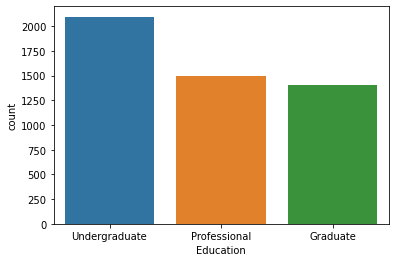

In [16]:
sns.countplot(data=df,x='Education')

The code snippet sns.countplot(data=df, x='Education') uses Seaborn to create a countplot for the 'Education' column in your DataFrame. A countplot is a type of bar plot that shows the counts of observations in each category of a categorical variable.

Text(0.5, 1.0, 'distribution of age')

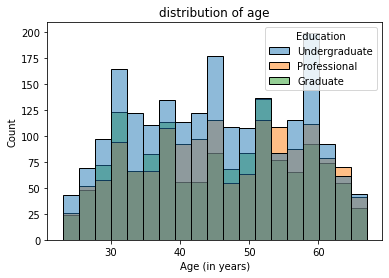

In [17]:
sns.histplot(data=df,x='Age (in years)',hue='Education')#histplot is also Univariate analysis here we had plot the graph against age distribution for eduction.
plt.title("distribution of age")

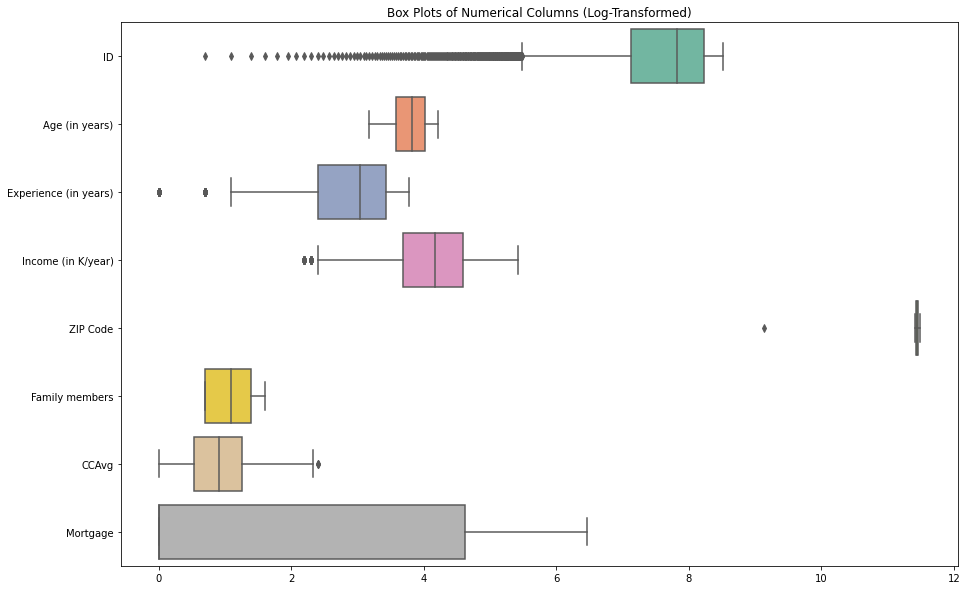

In [18]:
# df is your DataFrame
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Log-transform the data for clear visualization
df_log = np.log1p(df[numerical_columns])

# Create box plots for log-transformed data
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_log, orient='h', palette='Set2')  # 'orient' set to 'h' for horizontal box plots
plt.title('Box Plots of Numerical Columns (Log-Transformed)')
plt.show()


### Label Encoder

The Label Encoder is imported from scikit-learn to encode categorical variables in your DataFrame. This is a common preprocessing step when working with machine learning algorithms that require numerical input. The LabelEncoder transforms categorical labels into numerical labels.

In [19]:
le=LabelEncoder()
a=df.select_dtypes('object')#Select columns with the 'object' data type. As they are categorical columns.
for x in a.columns:
    df[x]=le.fit_transform(df[x])# Apply the fit_transform method of the LabelEncoder to transform the values in the selected column from categorical to numerical.
df

,ID,Age (in years),Experience (in years),Income (in K/year),Income Categorical,ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,TD Account,Online,CreditCard
0,15,67,41,112,1,91741,1,2.0,2,0,0,1,0,0,0
1,1481,67,42,32,0,93943,1,1.1,1,0,0,0,0,0,1
2,1860,67,41,20,0,91741,2,0.4,2,80,0,0,0,0,0
3,2847,67,43,105,1,93711,4,1.7,0,0,0,0,0,1,0
4,3265,67,41,114,1,95616,4,2.4,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3158,23,1,13,0,94720,4,1.0,2,84,0,0,0,1,0
4996,3426,23,1,12,0,91605,4,1.0,2,90,0,0,0,1,0
4997,3825,23,1,12,0,95064,4,1.0,2,0,0,1,0,0,1
4998,4286,23,3,149,1,93555,2,7.2,2,0,0,0,0,1,0


<AxesSubplot:>

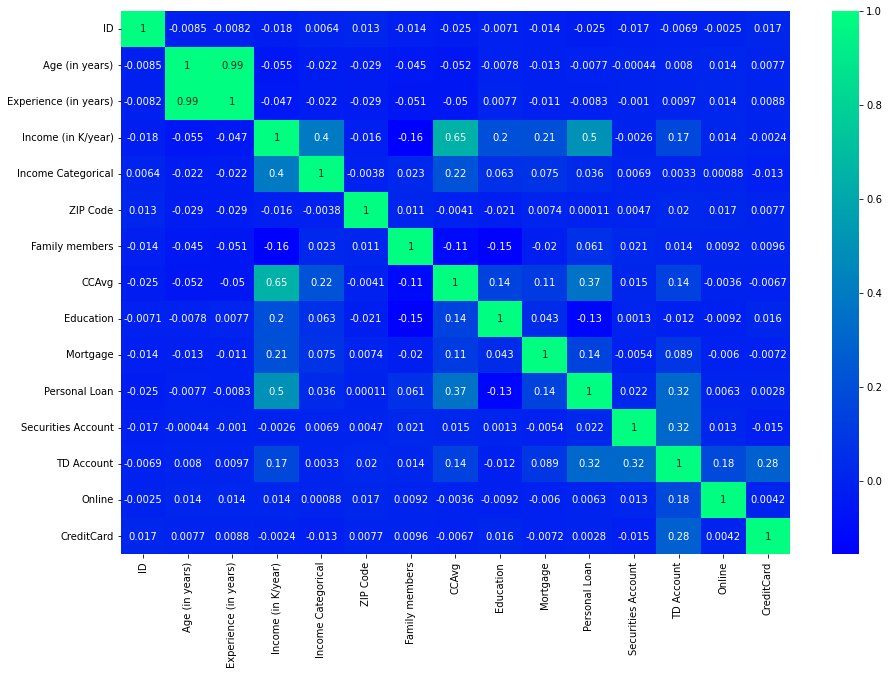

In [20]:
plt.figure(figsize=(15,10))# Sets the size of the figure to 15 inches in width and 10 inches in height
sns.heatmap(df.corr(),annot=True,cmap='winter')#Creates a heatmap using seaborn. The df.corr() computes the correlation matrix for the DataFrame df. The annot=True argument adds the correlation values to the heatmap. The cmap='winter' argument sets the color map for the heatmap to a winter color scheme.

This  above shown heatmap is useful for visually assessing the strength and direction of correlations between different pairs of numerical variables in your dataset. Green colors are indicate positive correlations, while blue colors indicate negative correlations. The numbers within the cells of the heatmap represent the correlation coefficients.

In [21]:
df

,ID,Age (in years),Experience (in years),Income (in K/year),Income Categorical,ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,TD Account,Online,CreditCard
0,15,67,41,112,1,91741,1,2.0,2,0,0,1,0,0,0
1,1481,67,42,32,0,93943,1,1.1,1,0,0,0,0,0,1
2,1860,67,41,20,0,91741,2,0.4,2,80,0,0,0,0,0
3,2847,67,43,105,1,93711,4,1.7,0,0,0,0,0,1,0
4,3265,67,41,114,1,95616,4,2.4,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3158,23,1,13,0,94720,4,1.0,2,84,0,0,0,1,0
4996,3426,23,1,12,0,91605,4,1.0,2,90,0,0,0,1,0
4997,3825,23,1,12,0,95064,4,1.0,2,0,0,1,0,0,1
4998,4286,23,3,149,1,93555,2,7.2,2,0,0,0,0,1,0


The goal of EDA is to gain insights into the underlying patterns, distributions, and relationships within the data, helping to inform subsequent steps in the data analysis or modeling process.

The below we use some commands that generate a variety of visualizations, including histograms, boxplots, and scatter plots, to explore the relationships between different features and the likelihood of taking a personal loan ('Personal Loan' category). These visualizations can provide insights into the distribution and patterns within the data.

<AxesSubplot:xlabel='Age (in years)'>

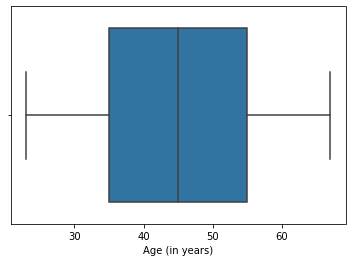

In [22]:
sns.boxplot(data=df,x='Age (in years)')

<AxesSubplot:xlabel='Age (in years)', ylabel='Experience (in years)'>

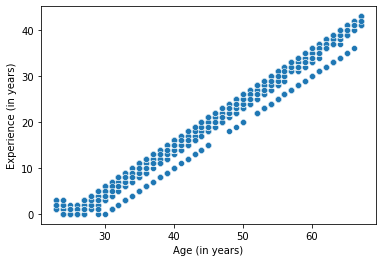

In [23]:
sns.scatterplot(data=df,x='Age (in years)',y='Experience (in years)')

<AxesSubplot:xlabel='Age (in years)', ylabel='Count'>

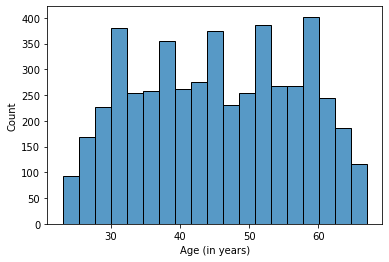

In [24]:
sns.histplot(data=df,x='Age (in years)')

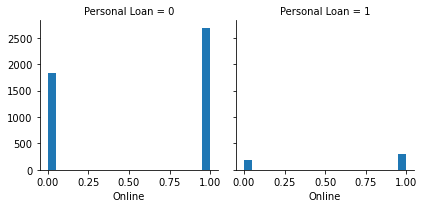

In [25]:
Online=sns.FacetGrid(df,col='Personal Loan')
Online.map(plt.hist,'Online',bins=20)

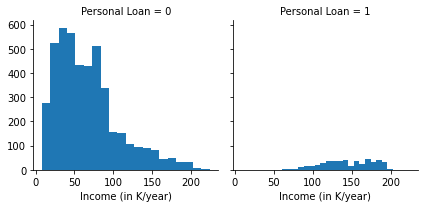

In [26]:
income=sns.FacetGrid(df,col='Personal Loan')
income.map(plt.hist,'Income (in K/year)',bins=20)

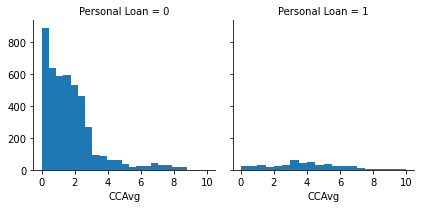

In [27]:
cc=sns.FacetGrid(df,col='Personal Loan')
cc.map(plt.hist,'CCAvg',bins=20)

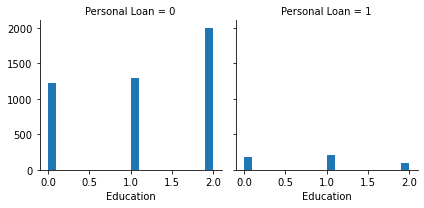

In [28]:
edu=sns.FacetGrid(df,col='Personal Loan')
edu.map(plt.hist,'Education',bins=20)

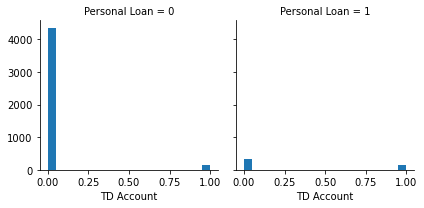

In [29]:
td=sns.FacetGrid(df,col='Personal Loan')
td.map(plt.hist,'TD Account',bins=20)

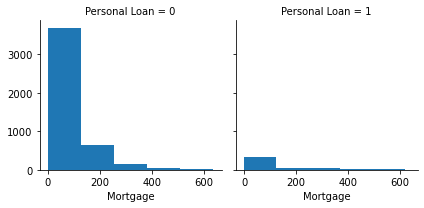

In [30]:
mortagage=sns.FacetGrid(df,col='Personal Loan')
mortagage.map(plt.hist,'Mortgage',bins=5)

the groupby function to group the DataFrame df by the 'Personal Loan' column and then counting the number of occurrences in each group. Here 0 means not taken the personal loan and 1 means taken the personal loan.

In [31]:
df.groupby(['Personal Loan']).count()

,ID,Age (in years),Experience (in years),Income (in K/year),Income Categorical,ZIP Code,Family members,CCAvg,Education,Mortgage,Securities Account,TD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480,480


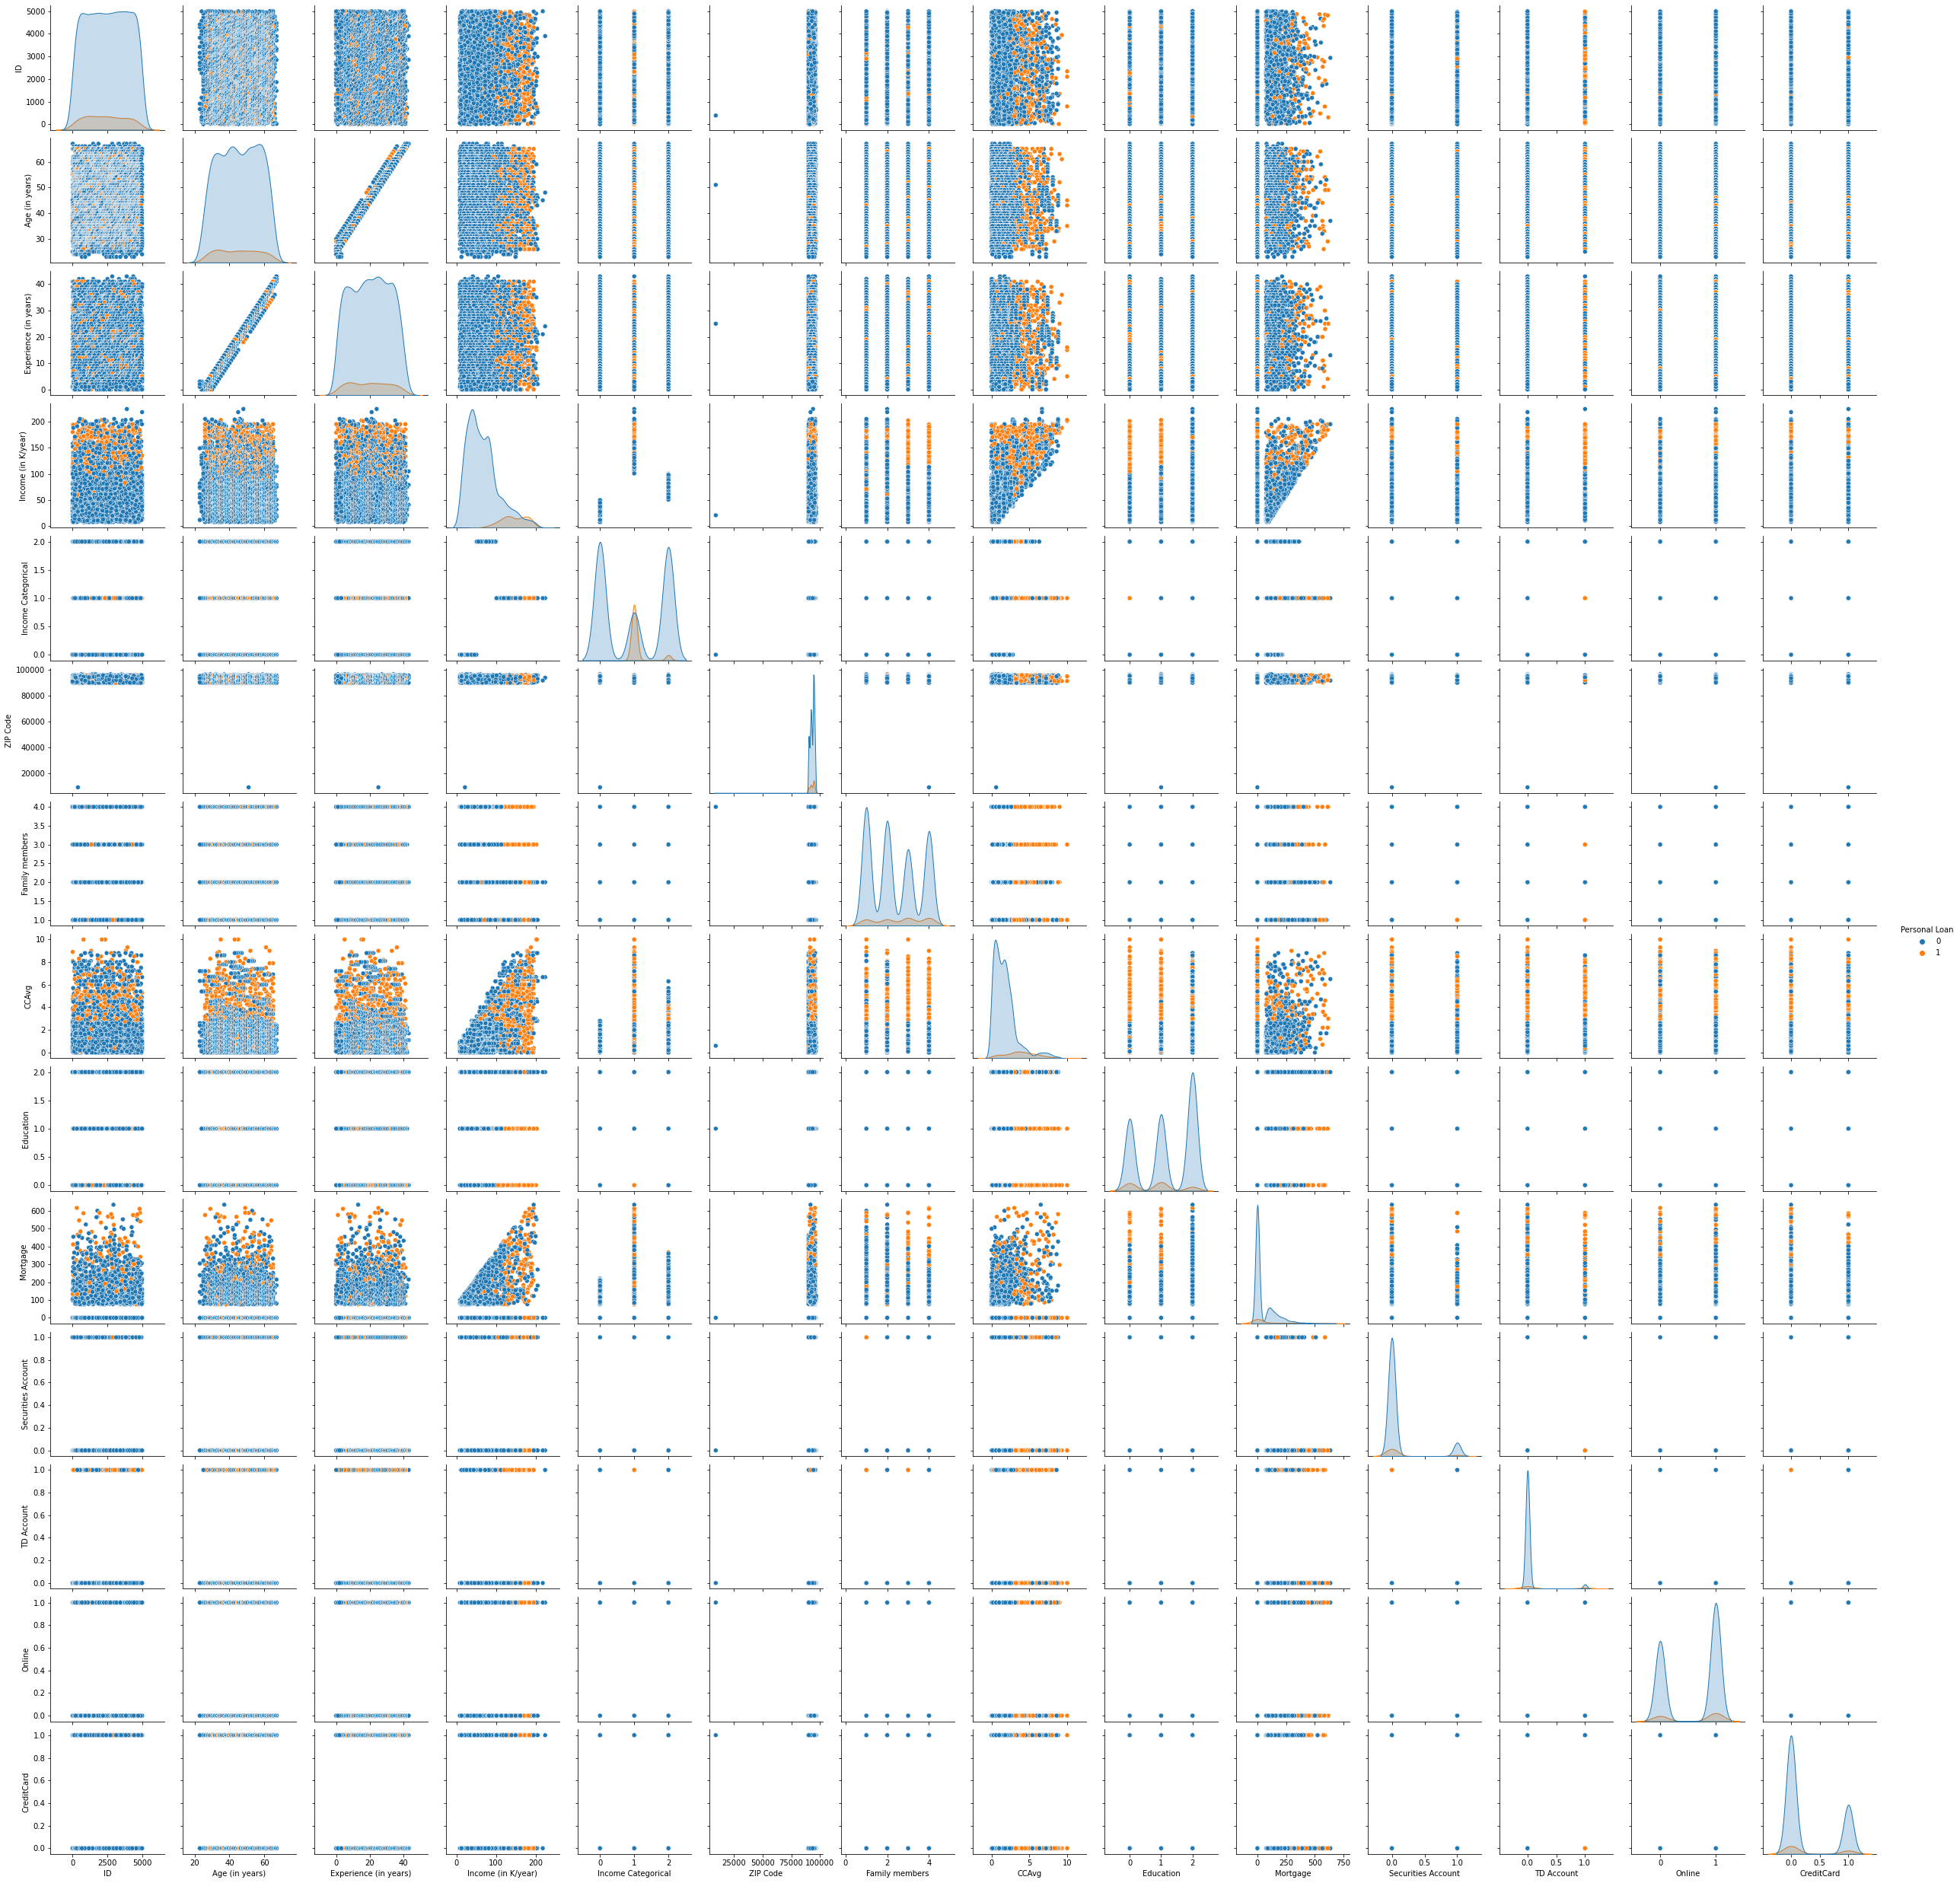

In [32]:
sns.pairplot(df,hue='Personal Loan',diag_kind='kde')

The code `sns.pairplot(df, hue='Personal Loan', diag_kind='kde')` is using the `seaborn` library to create a pair plot for the DataFrame `df`. A pair plot is a grid of scatterplots showing relationships between pairs of variables, and when the data is colored by a categorical variable (in this case, 'Personal Loan'), it can help visualize how different features vary together based on the target variable. Here's an explanation of the parameters used:

- `df`: The DataFrame you want to visualize.
- `hue='Personal Loan'`: The categorical variable ('Personal Loan') used to color the data points. It separates the data into different colors based on the values of the target variable.
- `diag_kind='kde'`: The type of plot for the diagonal subplots. Setting it to 'kde' means that the diagonal subplots will display kernel density estimates (smoothed histograms) for each variable.

Here's what the pair plot does:

- The scatterplots in the lower triangle show the relationship between pairs of numerical features. Each point represents a data point, and the color of the points is based on the 'Personal Loan' category.
  
- The kernel density plots (diagonal subplots) show the distribution of each numerical variable, separated by 'Personal Loan' category.

This type of visualization can be useful for quickly identifying patterns or trends in the data, especially when exploring the relationships between multiple variables in the context of the target variable ('Personal Loan').

### Key insight after EDA

After thorough exploratory data analysis (EDA) and visualization, the decision is to exclude the following variables from further analysis and modeling:

1. 'ID': Typically unique identifiers, often not contributing valuable information.
2. 'Age (in years)' and 'Experience (in years)': Potential multicollinearity, but don't have much impact.
3. 'Income Categorical': Considering the use of Income (in K/year) variable instead.
4. 'ZIP Code': Not deemed directly impactful for predicting the target variable.
5. 'Family members': Its relevance as a predictor seems limited.
6. 'Personal Loan': This is the target variable and won't be used as a feature.
7. 'Securities Account' and 'CreditCard': Not seen as crucial predictors based on analysis.

The decision to exclude these variables is driven by the goal of refining the feature set for more focused and effective predictive modeling. This process ensures that the features selected for the model are more likely to contribute meaningful information and enhance model performance.

### Step 5: Train-Test Split

The train-test split is a crucial step in the machine learning workflow that involves dividing your dataset into two subsets: one for training the model and another for evaluating its performance. This ensures that your model is tested on data it has never seen before, providing a more accurate assessment of its generalization capabilities. 

In [122]:
y=df[['Personal Loan']]
x=df.drop(columns=['ID', 'Age (in years)','Experience (in years)','Income Categorical', 'ZIP Code', 'Family members','Personal Loan', 'Securities Account','CreditCard'])

y: This is our target variable, the variable we want to predict (in this case, 'Personal Loan'). It is kept in a DataFrame format using double brackets.

x: These are our features, the variables that will be used to make predictions. we have excluded certain columns (ID, Age, Experience, etc.) from the original DataFrame using the drop method.

Now, x contains the features you'll use for training your machine learning model, and y contains the corresponding target variable. now we can proceed to split the data into training and testing sets and then train your model on the training set.

In [123]:
x

,Income (in K/year),CCAvg,Education,Mortgage,TD Account,Online
0,112,2.0,2,0,0,0
1,32,1.1,1,0,0,0
2,20,0.4,2,80,0,0
3,105,1.7,0,0,0,1
4,114,2.4,1,0,0,1
...,...,...,...,...,...,...
4995,13,1.0,2,84,0,1
4996,12,1.0,2,90,0,1
4997,12,1.0,2,0,0,0
4998,149,7.2,2,0,0,1


In [124]:
seed=7# Seed for reproducibility

# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.30,random_state=seed)

Now, we have x_train, x_test, y_train, and y_test ready for training and evaluating our machine learning model. we can use x_train and y_train for training our model and x_test and y_test for evaluating its performance.

### Step 6: Build and Train the Logistic Regression Model

Logistic Regression is a statistical method used for binary classification tasks, where the goal is to predict the probability that an instance belongs to a particular class. Despite its name, Logistic Regression is used for classification rather than regression.

In [125]:
# Instantiate a Logistic Regression model
Lr=LogisticRegression()

# Train the model on the training set
Lr.fit(x_train,y_train)

# Make predictions on the test set
y_predict=Lr.predict(x_test)

# Display the predicted values
print("y_predict is: ",y_predict)

# Evaluate the model score on the test set
model_score = Lr.score(x_test,y_test)
print("model_score is :",model_score)

y_predict is:  [0 1 0 ... 0 0 0]
model_score is : 0.9433333333333334


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Step 7: Evaluate the Model

Evaluating a classification model involves assessing its performance and understanding how well it generalizes to new, unseen data. Common metrics for evaluating classification models include accuracy, precision, recall, F1-score, and the confusion matrix

Accuracy: The proportion of correctly classified instances.

Precision: The proportion of true positive predictions among all positive predictions.

Recall (Sensitivity or True Positive Rate): The proportion of true positive predictions among all actual positives.

F1-score: The harmonic mean of precision and recall, providing a balance between the two.

Confusion Matrix: A table showing the counts of true positive, true negative, false positive, and false negative predictions.

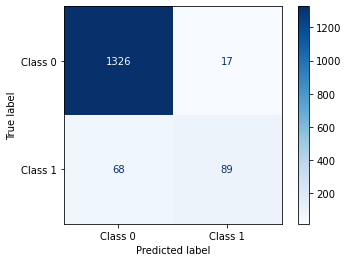

Confusion Matrix:
[[1326   17]
 [  68   89]]


In [126]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='d')  # Use cmap of your choice and set values_format to 'd' for integer formatting

# Show the plot
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

### Step 8: Interpret the Results

Interpreting the confusion matrix and classification report is crucial to understanding how well a classification model is performing.

classification report provides insights into how well the model performs for each class, considering both precision and recall. It also gives an overall accuracy, and the macro and weighted averages provide additional perspectives.

In [127]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1343
           1       0.84      0.57      0.68       157

    accuracy                           0.94      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.94      0.94      0.94      1500



#### Great! Let's interpret the metrics from our classification report:

- **Precision:**
  - Precision for class 0 (label 0) is high at 95%. This means that when the model predicts class 0, it is correct 95% of the time.
  - Precision for class 1 (label 1) is 84%. This means that when the model predicts class 1, it is correct 84% of the time.

- **Recall (Sensitivity or True Positive Rate):**
  - Recall for class 0 is very high at 99%. This means that out of all instances of class 0 in the dataset, the model correctly identified 99%.
  - Recall for class 1 is 57%. This means that out of all instances of class 1 in the dataset, the model correctly identified 57%.

- **F1-score:**
  - F1-score for class 0 is high at 97%.
  - F1-score for class 1 is 68%.

- **Support:** The number of actual occurrences of each class in the specified dataset. Class 0 has significantly more instances (1343) than class 1 (157).

- **Accuracy:** The overall accuracy of the model is 94%. This is the ratio of correctly classified instances to the total instances.

- **Macro Avg:** The macro average calculates metrics independently for each class and then takes the average. It gives equal weight to each class. In this case, the macro average is 0.90 for precision, 0.78 for recall, and 0.82 for F1-score.

- **Weighted Avg:** The weighted average calculates metrics for each class, but it takes into account the relative number of instances of each class. In this case, the weighted average is 0.94 for precision, recall, and F1-score.


#### Interpretation:

- The model has excellent performance for class 0, with high precision, recall, and F1-score.
- For class 1, the precision is good, but the recall is relatively lower, indicating that the model may miss some instances of class 1.
- The overall accuracy of 94% is good, but it's important to consider the class imbalance (class 0 has many more instances than class 1).
- The weighted average is useful in this scenario as it considers the imbalance, and it indicates strong overall model performance.

## Summary 
        Our model seems to perform well overall, with particularly high performance for class 0. The lower recall for class 1 might be a consideration depending on the specific goals of your application, We can give more accurate information about to whom Bank should'nt consider of lending personal loan.
        
        - People with online accounts surprisingly didn't take loans. This suggests we could create special loan offers for them, potentially increasing loan sales and revenue from this customer segment.
        - Customers with lower incomes, credit scores, and undergraduates also didn't take many loans. We suggested making easier loans for them, which could expand the customer base and boost loan sales.
        - Those without TD accounts didn't take loans much, so we recommended linking loans with TD account promotions, potentially increasing loan sales by attracting more customers to both services.

        Our suggestions aim to not only cater to specific customer groups but also to potentially increase the bank's revenue by selling more loans to these areas.

#                                  THANK YOU.